In [1]:
# import necessary library and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(12,7)

In [2]:
# reading the data and showing...
df = pd.read_csv('data/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
# replacing '?' as missing values
df.replace(to_replace='?', value=np.nan, inplace=True)
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [4]:
# cchecking the percentage of missing rows to all rows
per = round((1381 / df.shape[0])*100,3)
print(f'The Missing value percentage {per}%')

The Missing value percentage 4.241%


In [5]:
# droping all the missing values
df.dropna(axis=0, inplace=True)

In [6]:
num_df = df.select_dtypes(include=['int64', 'float64'])
num_col = df.select_dtypes(include=['int64', 'float64']).columns
# showing the numerical columns only
num_col

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

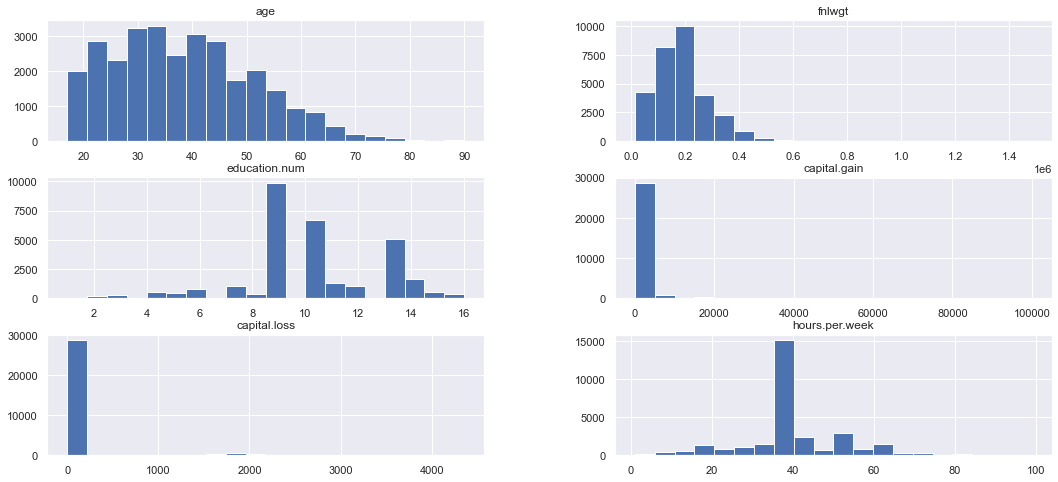

In [7]:
# plotting them together to get ovierviews
# plotting numerical column only
num_df.hist(figsize=(18,8), bins=20);

In [8]:
df.drop('fnlwgt', axis=1, inplace=True)
print('Column droped')

Column droped


In [9]:
df.drop('education.num', axis=1, inplace=True)
print('column droped')

column droped


In [10]:
# droping these column
df.drop(['capital.gain', 'capital.loss'], axis=1, inplace=True)
print('Column Droped')

Column Droped


Max hour:  78
Min hour:  1
Total Hours in a week: 168


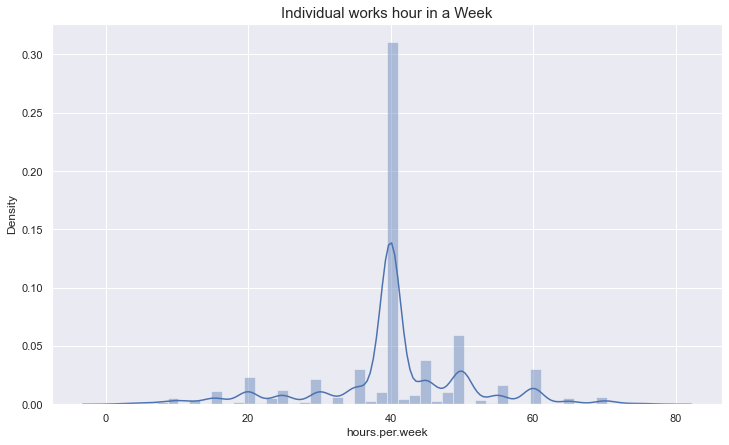

In [11]:
# find the 99quantile value form hours per week column
q = df['hours.per.week'].quantile(q = 0.99) # it return a single value

# repleacing this value to dataframe and crearting another dataframe
df1 = df[df['hours.per.week']<q]
# checking the hours.per.week column
sns.distplot(df1['hours.per.week']);
plt.title('Individual works hour in a Week', fontsize=15);

# checking the max and min value
print('Max hour: ',df1['hours.per.week'].max())
print('Min hour: ',df1['hours.per.week'].min())
print(f'Total Hours in a week: {7*24}' )

In [12]:
# creating function to replace the similar qualification 
def edu_rep(text):
    school = ['HS-grad', '11th', '10th', '7th-8th', '9th', '12th', '5th-6th', '1st-4th', 'Preschool']
    college = ['Some-college','Bachelors','Prof-school']
    master = ['Masters', 'Doctorate']
    associ = ['Assoc-voc', 'Assoc-acdm']
    # checking the value that is inside of edu list
    if text in school:
        return 'School-Level'
    elif text in college:
        return 'College-Level'
    elif text in master:
        return 'Masters'
    elif text in associ:
        return 'Associate'
    
    
# applying the function and making another column
df1['Education Level'] = df1['education'].apply(lambda x: edu_rep(x))

# comparing both of column that it workd right
df1[['education', 'Education Level']]

,education,Education Level
1,HS-grad,School-Level
3,7th-8th,School-Level
4,Some-college,College-Level
5,HS-grad,School-Level
6,10th,School-Level
...,...,...
32556,Some-college,College-Level
32557,Assoc-acdm,Associate
32558,HS-grad,School-Level
32559,HS-grad,School-Level


In [13]:
df1.drop('marital.status', axis=1, inplace=True)

In [14]:
df1.drop('relationship', axis=1, inplace=True)
print('column droped')

column droped


In [15]:
df1.drop('race', axis=1, inplace=True)
print('column dropped')

column dropped


In [16]:
# majority is on USA.
df1.drop('native.country', axis=1, inplace=True)
print('Droped')

Droped


In [17]:
df1.head()

,age,workclass,education,occupation,sex,hours.per.week,income,Education Level
1,82,Private,HS-grad,Exec-managerial,Female,18,<=50K,School-Level
3,54,Private,7th-8th,Machine-op-inspct,Female,40,<=50K,School-Level
4,41,Private,Some-college,Prof-specialty,Female,40,<=50K,College-Level
5,34,Private,HS-grad,Other-service,Female,45,<=50K,School-Level
6,38,Private,10th,Adm-clerical,Male,40,<=50K,School-Level


In [18]:
# droping the education column
df1.drop('education', axis=1, inplace=True)

In [19]:
# encoding the target column
df1['income_enc'] = df1['income'].map({"<=50K":0, ">50K":1})
df1.head()

,age,workclass,occupation,sex,hours.per.week,income,Education Level,income_enc
1,82,Private,Exec-managerial,Female,18,<=50K,School-Level,0
3,54,Private,Machine-op-inspct,Female,40,<=50K,School-Level,0
4,41,Private,Prof-specialty,Female,40,<=50K,College-Level,0
5,34,Private,Other-service,Female,45,<=50K,School-Level,0
6,38,Private,Adm-clerical,Male,40,<=50K,School-Level,0


In [20]:
# droping the old target column
df1.drop('income', axis=1, inplace=True)

In [21]:
# checking describe for last time before jumping to model building part
df1.describe(include='all')

,age,workclass,occupation,sex,hours.per.week,Education Level,income_enc
count,29847.000000,29847,29847,29847,29847.000000,29847,29847.000000
unique,NaN,7,14,2,NaN,4,NaN
top,NaN,Private,Craft-repair,Male,NaN,School-Level,NaN
freq,NaN,22126,4008,20111,NaN,13439,NaN
mean,38.413911,NaN,NaN,NaN,40.436962,NaN,0.247730
std,13.148096,NaN,NaN,NaN,10.998786,NaN,0.431701
min,17.000000,NaN,NaN,NaN,1.000000,NaN,0.000000
25%,28.000000,NaN,NaN,NaN,40.000000,NaN,0.000000
50%,37.000000,NaN,NaN,NaN,40.000000,NaN,0.000000
75%,47.000000,NaN,NaN,NaN,45.000000,NaN,0.000000


In [22]:
df1.dtypes

age                 int64
workclass          object
occupation         object
sex                object
hours.per.week      int64
Education Level    object
income_enc          int64
dtype: object

In [23]:
df1.head()

,age,workclass,occupation,sex,hours.per.week,Education Level,income_enc
1,82,Private,Exec-managerial,Female,18,School-Level,0
3,54,Private,Machine-op-inspct,Female,40,School-Level,0
4,41,Private,Prof-specialty,Female,40,College-Level,0
5,34,Private,Other-service,Female,45,School-Level,0
6,38,Private,Adm-clerical,Male,40,School-Level,0


In [24]:
# dividing X and y
X = df1.drop('income_enc',axis=1)
y = df1['income_enc']

# checking the shape
X.shape, y.shape

((29847, 6), (29847,))

In [25]:
# creating list of numeical and categorical feature list
num_features = X.select_dtypes(include=np.number).columns.tolist()
cat_features = X.select_dtypes(exclude=np.number).columns.tolist()
# shwowing the list
num_features, cat_features

(['age', 'hours.per.week'],
 ['workclass', 'occupation', 'sex', 'Education Level'])

In [26]:
# dividing traning and test set
# importing traintestsplit
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

# checking the shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((23877, 6), (5970, 6), (23877,), (5970,))

In [27]:
# creating Pipeline for web app
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
# importing XGBoostClassifier
from xgboost import XGBClassifier

# creating insatance of xgboost with hyperparameters obtain from grid search
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5,
              learning_rate=0.2, max_delta_step=5, max_depth=5,
              min_child_weight=1, missing=1, n_estimators=150, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


# creating numeric transformer
num_trans = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# creating categorical transformer
cat_trans = OneHotEncoder(drop='first', sparse=False)

# Creating final preprocessor pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', num_trans, num_features),
    ('cat', cat_trans, cat_features)
])


# final pipeline with model, Xgboost
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb)
])



In [28]:
# fitting the data
model.fit(X_train, y_train)


[18:30:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'hours.per.week']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['workclass', 'occupation',
                                                   'sex',
                                                   'Education Level'])])),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_b...
                               im

In [29]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
X_test

,age,workclass,occupation,sex,hours.per.week,Education Level
26342,42,Private,Transport-moving,Male,40,School-Level
8892,42,Private,Exec-managerial,Female,50,College-Level
8425,31,Private,Exec-managerial,Female,70,College-Level
13985,29,State-gov,Adm-clerical,Male,40,College-Level
13128,29,Private,Prof-specialty,Male,40,College-Level
...,...,...,...,...,...,...
11871,33,Private,Tech-support,Male,40,School-Level
18504,32,Private,Exec-managerial,Female,50,College-Level
2317,26,Private,Prof-specialty,Male,40,Masters
2414,39,Private,Craft-repair,Male,60,Associate


In [32]:
model.predict(X_test.iloc[0:1])

array([0], dtype=int64)

In [33]:
from sklearn.metrics import roc_auc_score
# checking the roc_auc_score on test data
roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

0.8440094464781613

In [38]:
in_ar = np.array([42, "Private", "Transport-moving", "Male", 40, "School-Level"])
in_ar

array(['42', 'Private', 'Transport-moving', 'Male', '40', 'School-Level'],
      dtype='<U16')

In [39]:
X_test.columns

Index(['age', 'workclass', 'occupation', 'sex', 'hours.per.week',
       'Education Level'],
      dtype='object')

In [40]:
d = pd.DataFrame([in_ar], columns=['age', 'workclass', 'occupation', 'sex', 
                                   'hours.per.week', 'Education Level'])

d

,age,workclass,occupation,sex,hours.per.week,Education Level
0,42,Private,Transport-moving,Male,40,School-Level


In [41]:
p = model.predict(d)
p

array([0], dtype=int64)

## As the model pipeline build sucessfully, now getting the categorical features value form the web app

In [42]:
X['workclass'].value_counts()

Private             22126
Self-emp-not-inc     2409
Local-gov            2051
State-gov            1271
Self-emp-inc         1038
Federal-gov           938
Without-pay            14
Name: workclass, dtype: int64

In [43]:
X['occupation'].value_counts()

Craft-repair         4008
Prof-specialty       3986
Exec-managerial      3947
Adm-clerical         3716
Sales                3551
Other-service        3182
Machine-op-inspct    1960
Transport-moving     1536
Handlers-cleaners    1344
Farming-fishing       929
Tech-support          905
Protective-serv       633
Priv-house-serv       141
Armed-Forces            9
Name: occupation, dtype: int64

In [44]:
X['Education Level'].value_counts()

School-Level     13439
College-Level    12147
Associate         2293
Masters           1968
Name: Education Level, dtype: int64

In [45]:
X['sex'].value_counts()

Male      20111
Female     9736
Name: sex, dtype: int64

In [47]:
# now saving the full pipeline
import joblib
joblib.dump(model, 'census_income_84_auc_scr_full_pipeline2.pkl', compress=3)

['census_income_84_auc_scr_full_pipeline2.pkl']

In [48]:
# loading the file and checking it
loadmodel = joblib.load('census_income_84_auc_scr_full_pipeline2.pkl')

In [49]:
loadmodel.predict(d)

array([0], dtype=int64)